In [1]:
# https://seaborn.pydata.org/examples/index.html

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the example mpg dataset
tips = sns.load_dataset("tips")

tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='tip_pct', ylabel='day'>

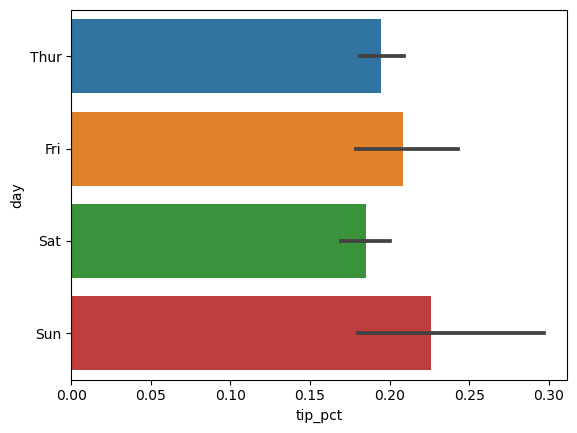

In [6]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")
# data - z.B. ein Pandas Data Frame
# x - Daten auf x-Achse, Spalte im Data Frame
# y - y-Achse, Spalte im Data Frame
# Die tip_pct nicht nicht alle gleich z.B. an Sonntagen, daher wird das 95% Konfidenzinterval mit dem schwarzen Balken dargestellt. 
# Hier wird klar: das Restaurant ist wohl nur Donnerstag bis Sonntag geöffnet.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='tip_pct', ylabel='day'>

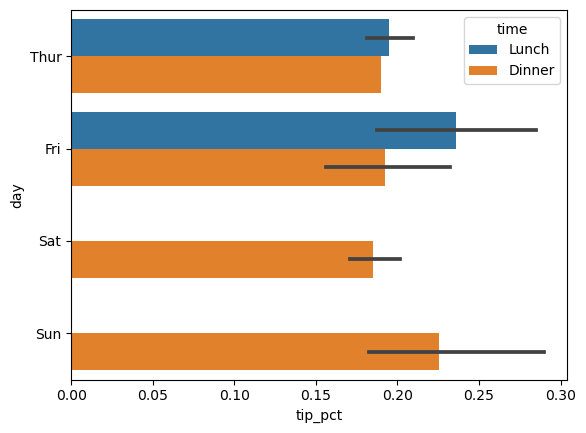

In [7]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")
# Farblich hinzu kommt nun die Unterscheidung nach Luch/Dinner, Lunch gibt es nur an Wochentagen, nicht am Wochenende.

<Axes: ylabel='Frequency'>

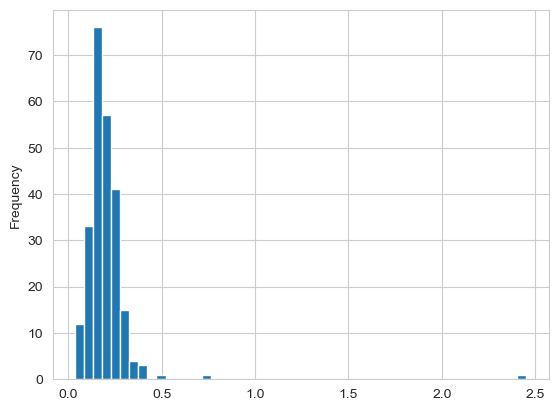

In [8]:
sns.set_style("whitegrid")
tips["tip_pct"].plot.hist(bins=50)
# Aus dem Histogramm kann der geamte Wertebereich der tip_pct abgelesen werden.
# Es gibt wohl eine Beobachtung wo mehr als das Doppelte des Rechnungsbetrages als Trinkgeld bezahlt wurde, 
# hier ist  zu entscheiden ob es sich um einen Ausreiser handelt und wie damit umgegangen werden soll.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='tip_pct', ylabel='Probability'>

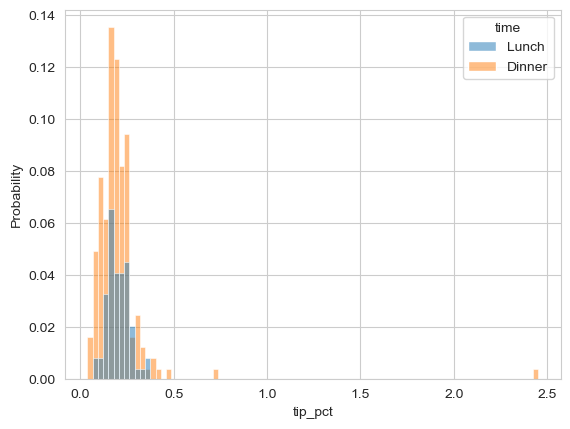

In [9]:
sns.set_style("whitegrid")
sns.histplot(
    data=tips, x="tip_pct", hue="time",
    stat="probability"
)
# Farbliche Unterscheidung nach time
# mit stat="probability" ist die Summe der bars

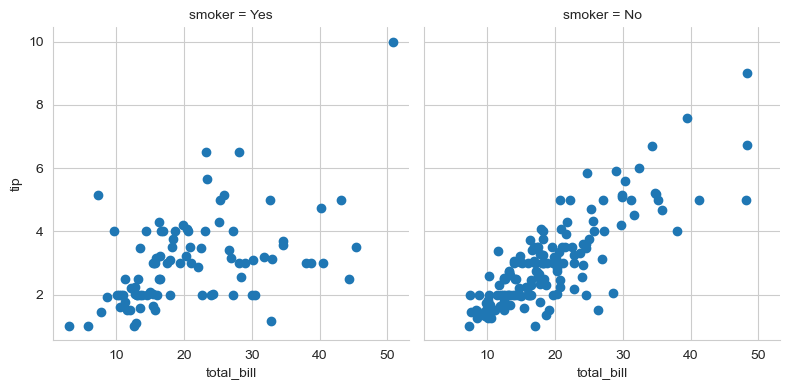

In [10]:
g = sns.FacetGrid(tips, col="smoker", height=4, aspect=1)
g.map(plt.scatter, "total_bill", "tip")

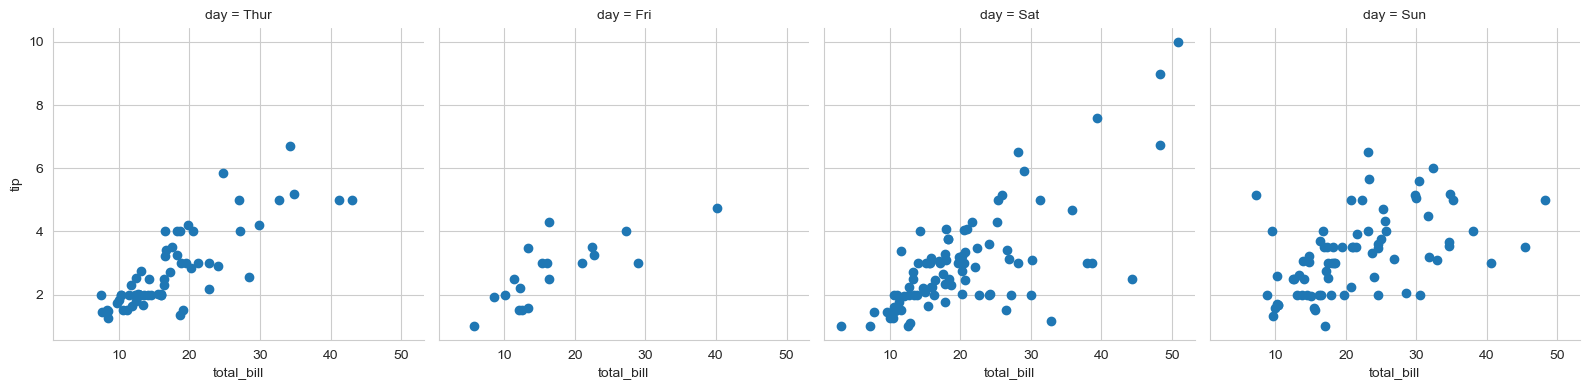

In [11]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=1)
g.map(plt.scatter, "total_bill", "tip")

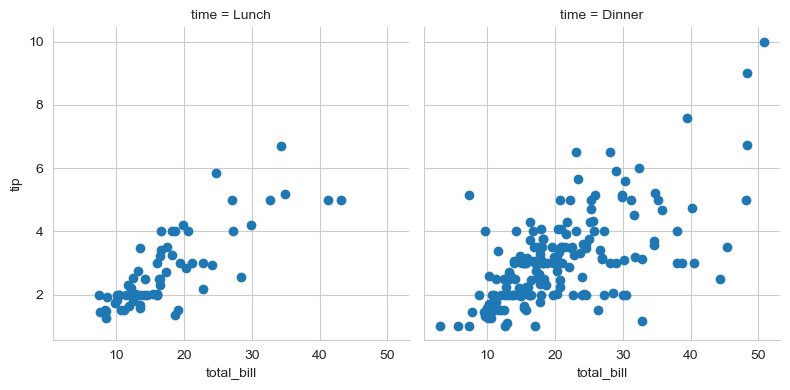

In [12]:
g = sns.FacetGrid(tips, col="time", height=4, aspect=1)
g.map(plt.scatter, "total_bill", "tip")

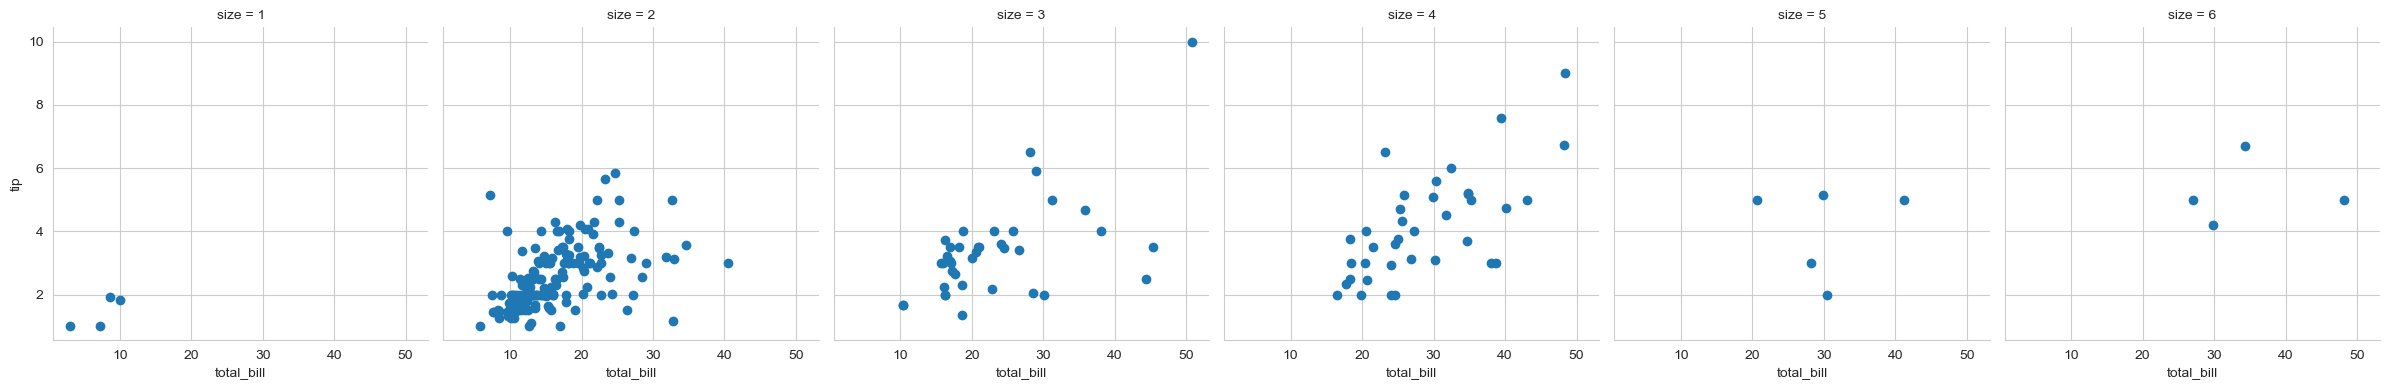

In [13]:
g = sns.FacetGrid(tips, col="size", height=4, aspect=1)
g.map(plt.scatter, "total_bill", "tip")

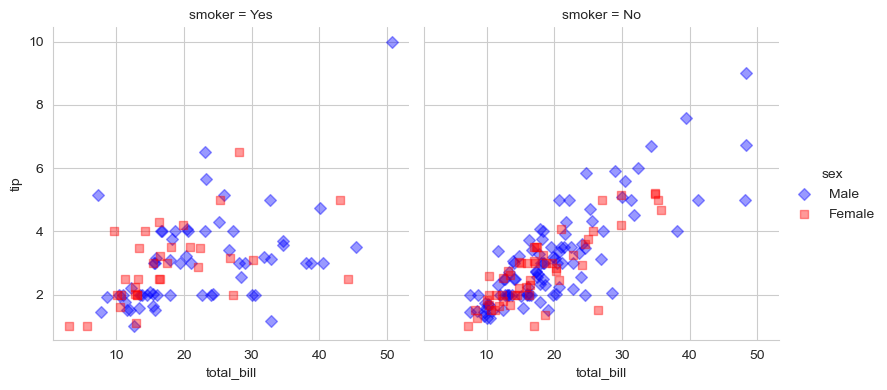

In [14]:
pal = dict(Female='red', Male='blue') # Female und Male farblich unterscheiden
g = sns.FacetGrid(tips, col="smoker", hue="sex", palette=pal, height=4, aspect=1, hue_kws={"marker": ["D", "s"]}) # verschiedene Marker für die farblich unterschiedenen Kategorien
g.map(plt.scatter, "total_bill", "tip", alpha=.4)
g.add_legend();

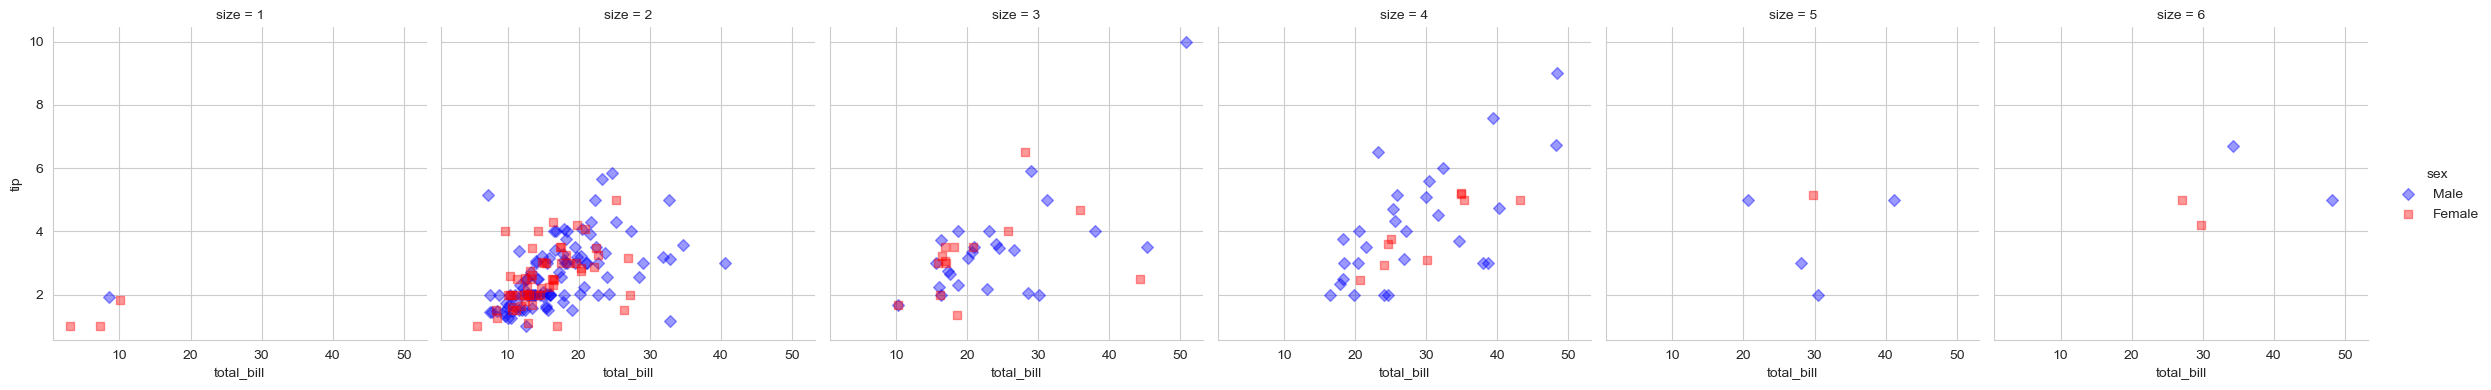

In [15]:
pal = dict(Female='red', Male='blue') # Female und Male farblich unterscheiden
g = sns.FacetGrid(tips, col="size", hue="sex", palette=pal, height=4, aspect=1, hue_kws={"marker": ["D", "s"]}) # verschiedene Marker für die farblich unterschiedenen Kategorien
g.map(plt.scatter, "total_bill", "tip", alpha=.4)
g.add_legend()

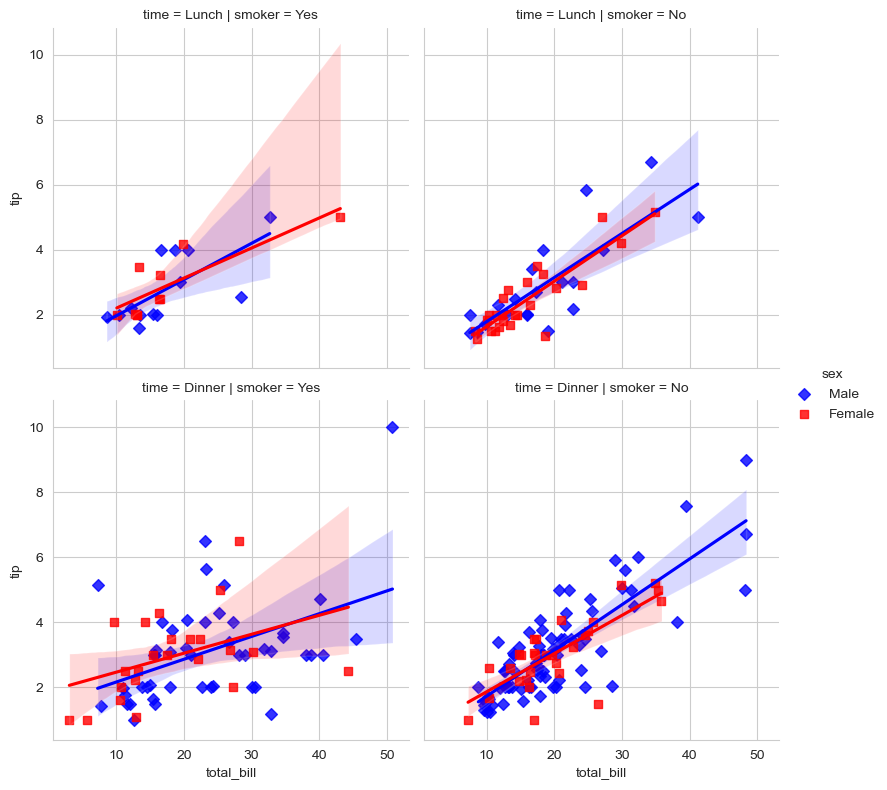

In [16]:
# Analyse von 5 Dimensionen - total_bill, tip, smoker, time, sex
pal = dict(Female='red', Male='blue')
g = sns.FacetGrid(tips, col="smoker", row="time", hue="sex", palette=pal, height=4, aspect=1, hue_kws={"marker": ["D", "s"]})
g.map(sns.regplot, "total_bill", "tip") # regplot - regression plot äquivalent zu lmplot 
g.add_legend()

# Bild speichern
#plt.savefig('dvpj_1016.png', dpi=300)

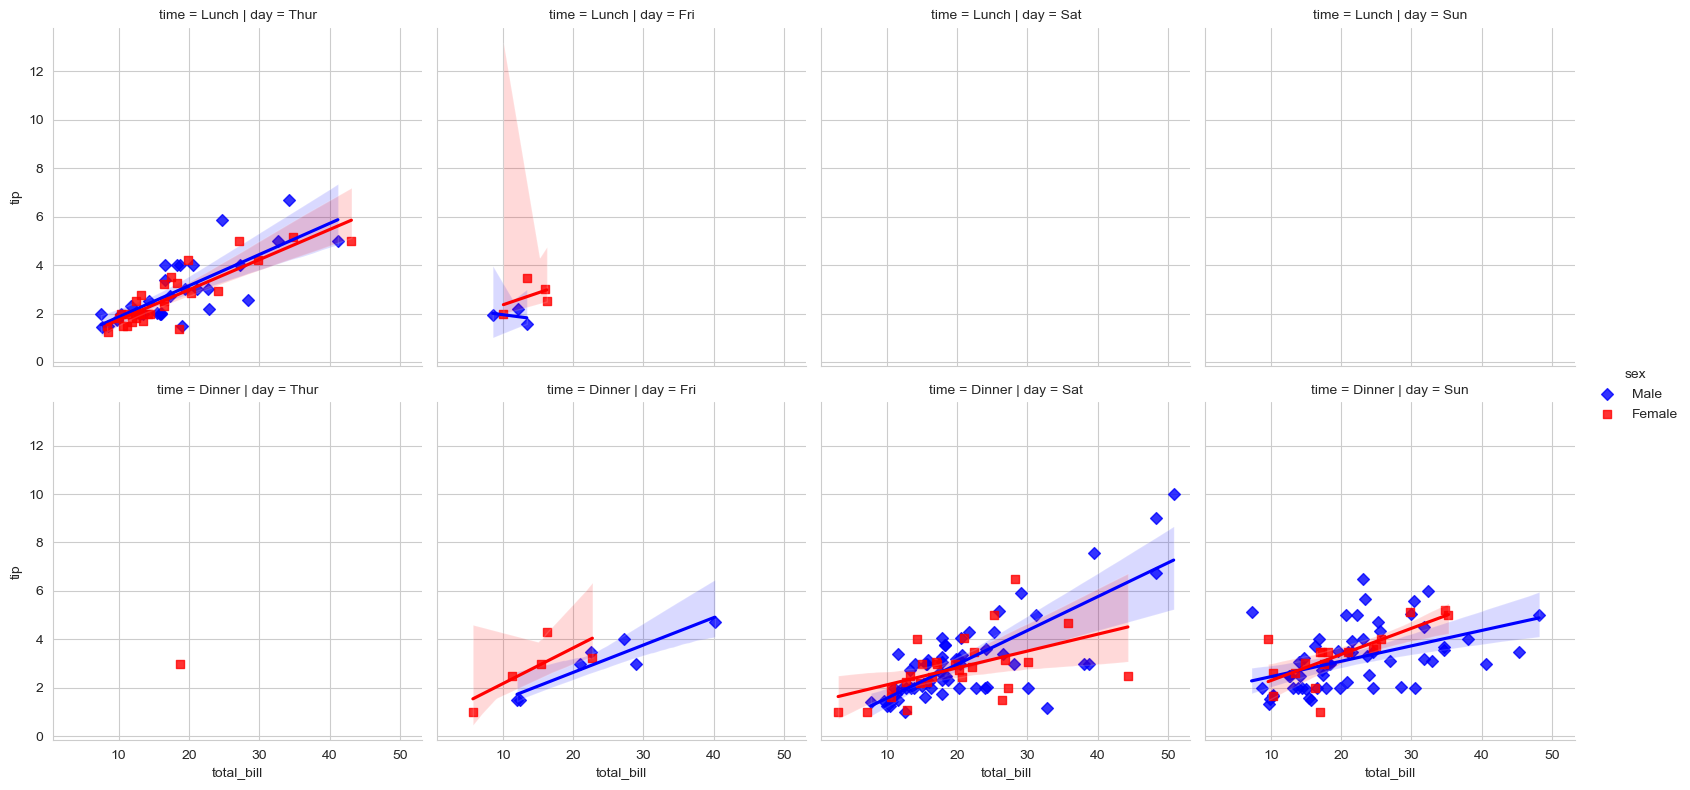

In [17]:
# Analyse von 5 Dimensionen - total_bill, tip, smoker, time, sex
pal = dict(Female='red', Male='blue')
g = sns.FacetGrid(tips, col="day", row="time", hue="sex", palette=pal, height=4, aspect=1, hue_kws={"marker": ["D", "s"]})
g.map(sns.regplot, "total_bill", "tip") # regplot - regression plot äquivalent zu lmplot 
g.add_legend()

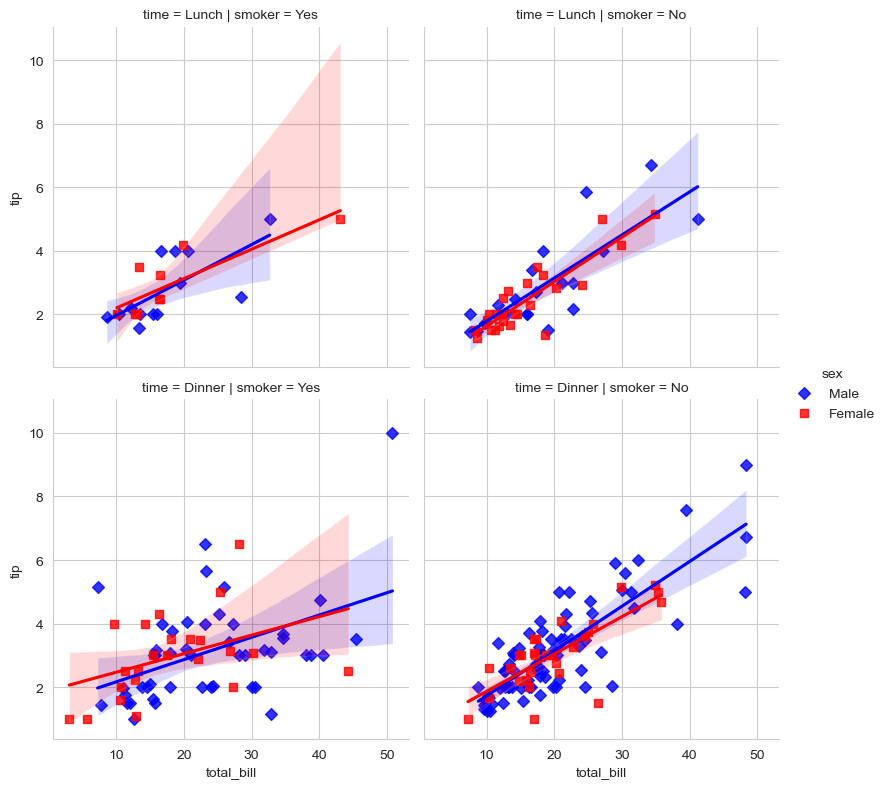

In [18]:
pal = dict(Female='red', Male='blue')

# Alternativ, etwas schneller das selbe Ergebnis mit Hilfe von lmplot
sns.lmplot(x="total_bill", y="tip", hue="sex", 
           height=4, aspect=1, markers=["D", "s"],
           col="smoker", row="time", data=tips, palette=pal           
           )

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

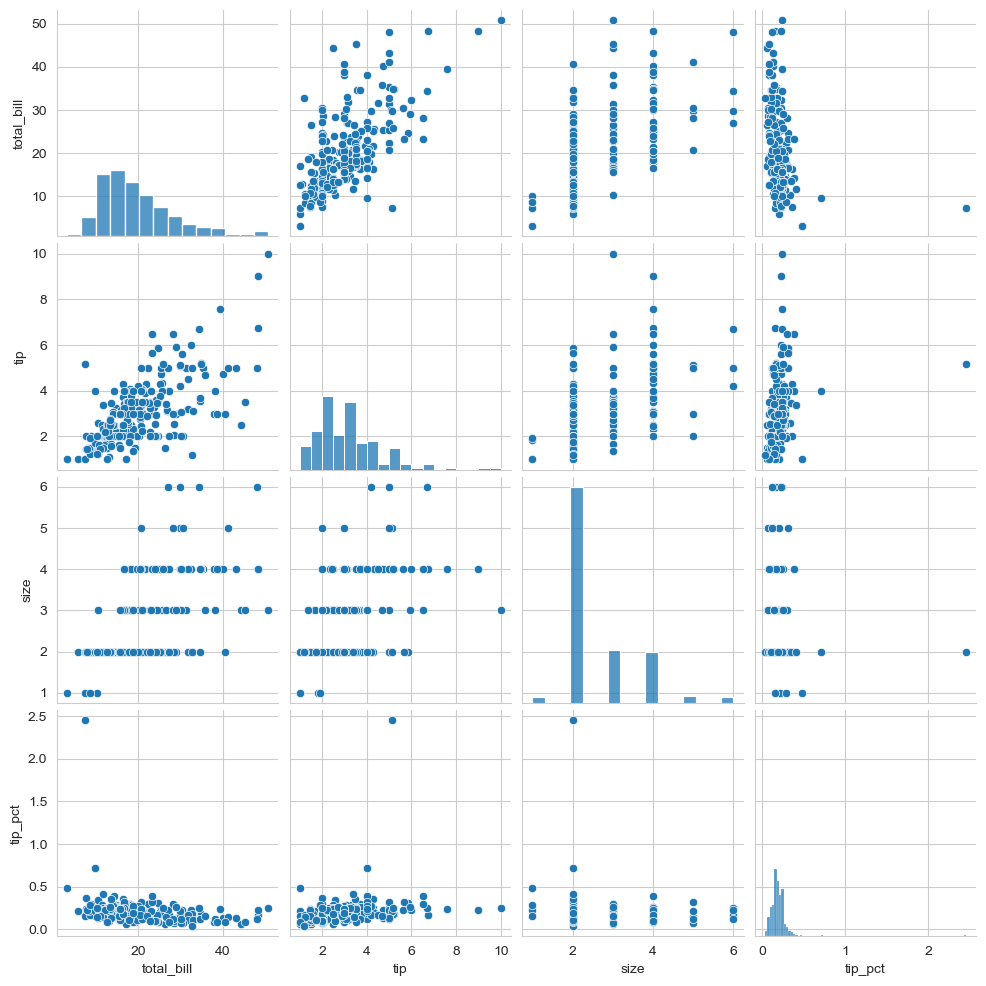

In [19]:
sns.set_style("whitegrid")
sns.pairplot(tips)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1519: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue_grouped = self.data[var].groupby(self.hue_vals)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1626: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue_grouped = self.data.groupby(self.hue_vals)


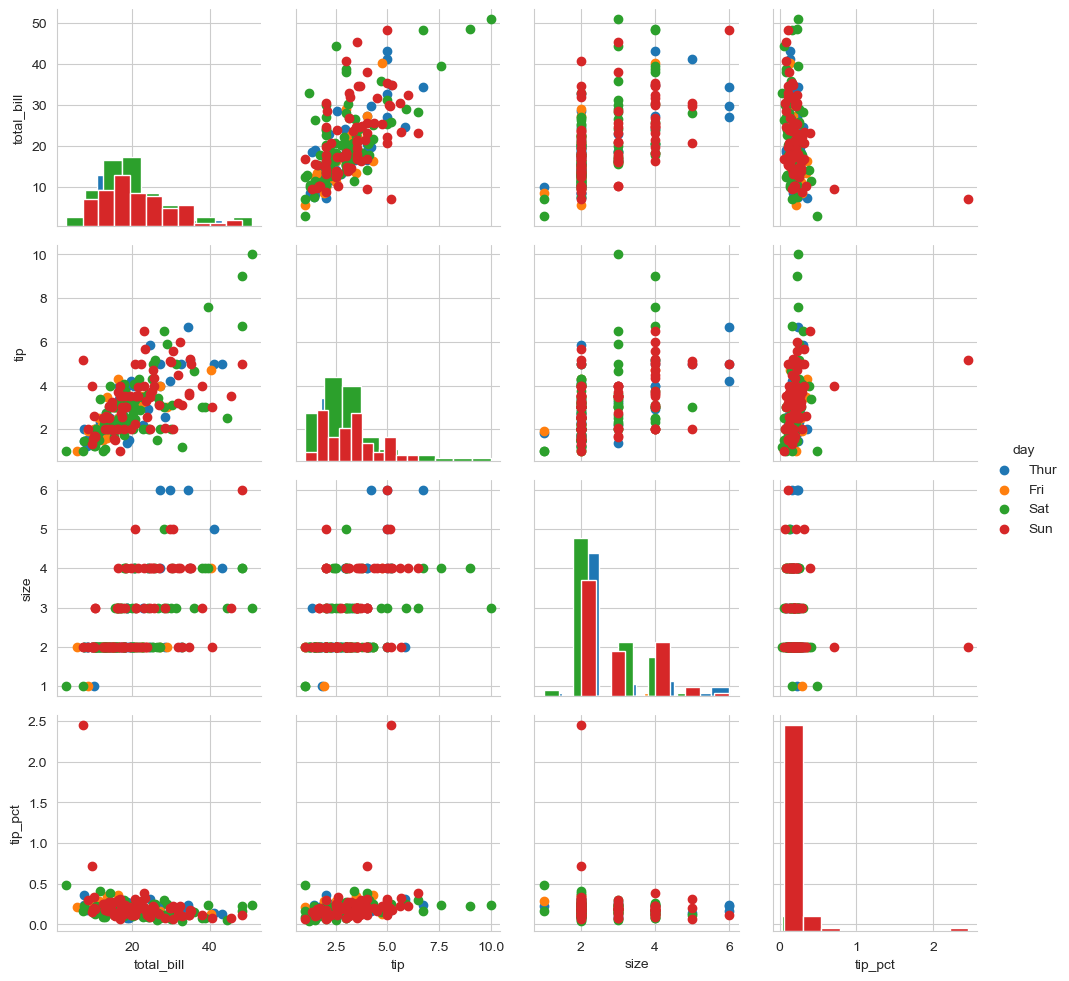

In [20]:
g = sns.PairGrid(tips, hue='day')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1519: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue_grouped = self.data[var].groupby(self.hue_vals)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1626: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue_grouped = self.data.groupby(self.hue_vals)


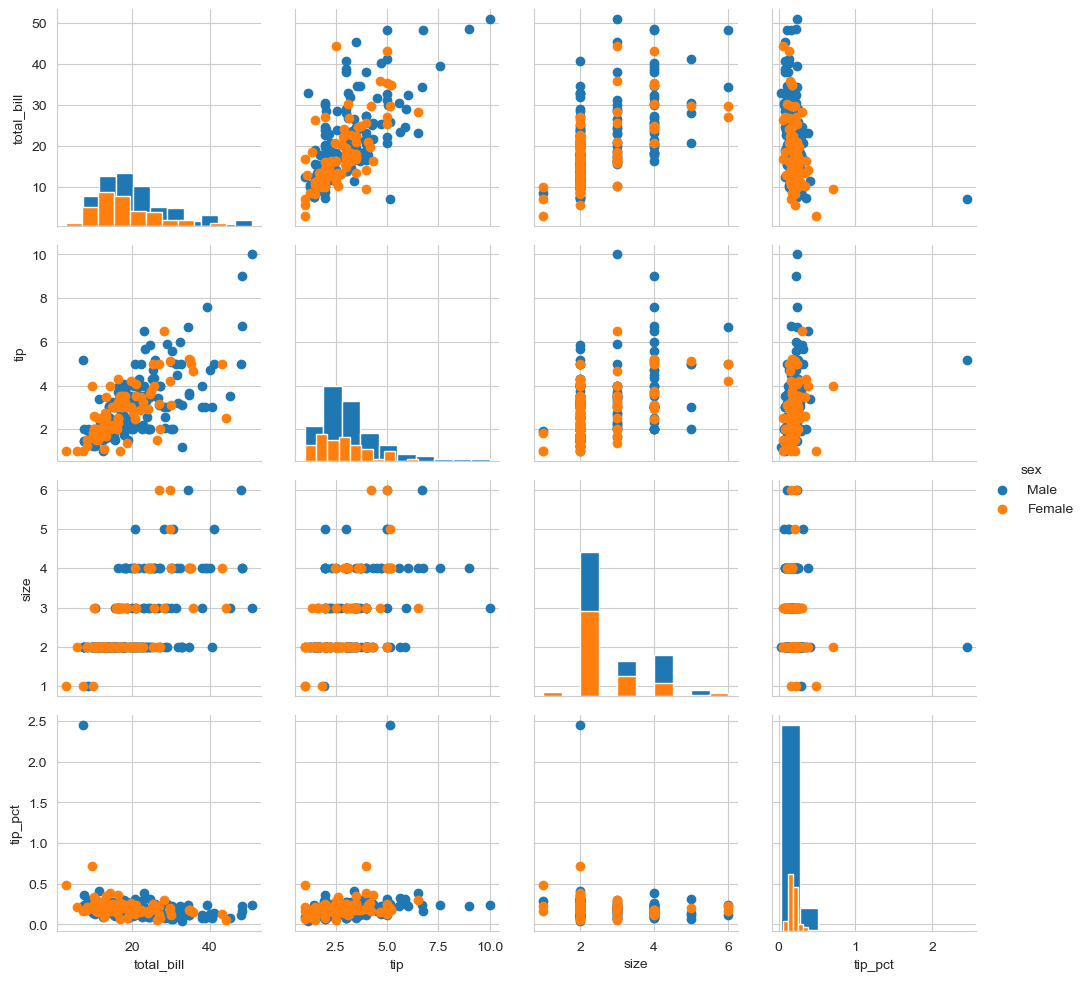

In [21]:
g = sns.PairGrid(tips, hue='sex')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1519: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue_grouped = self.data[var].groupby(self.hue_vals)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1626: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue_grouped = self.data.groupby(self.hue_vals)


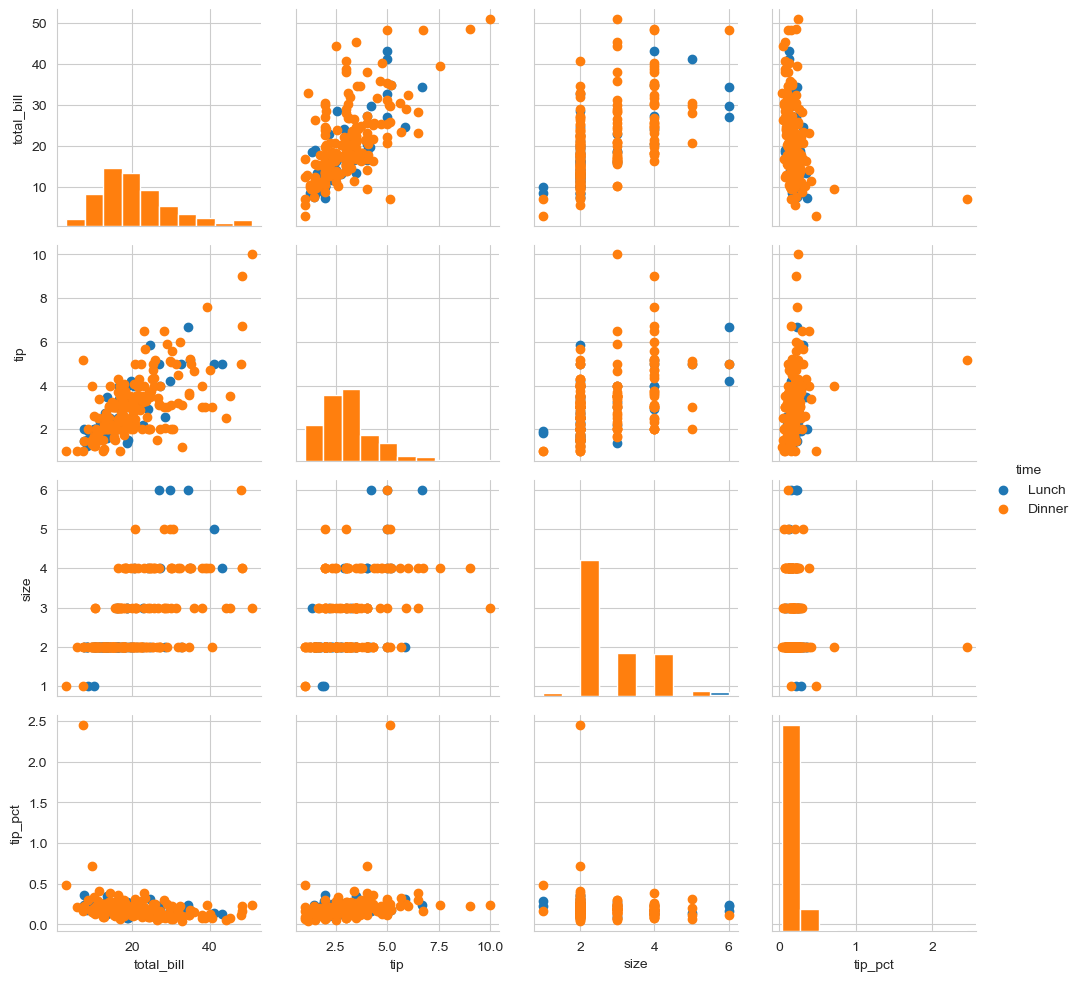

In [22]:
g = sns.PairGrid(tips, hue='time')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1519: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue_grouped = self.data[var].groupby(self.hue_vals)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1626: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue_grouped = self.data.groupby(self.hue_vals)


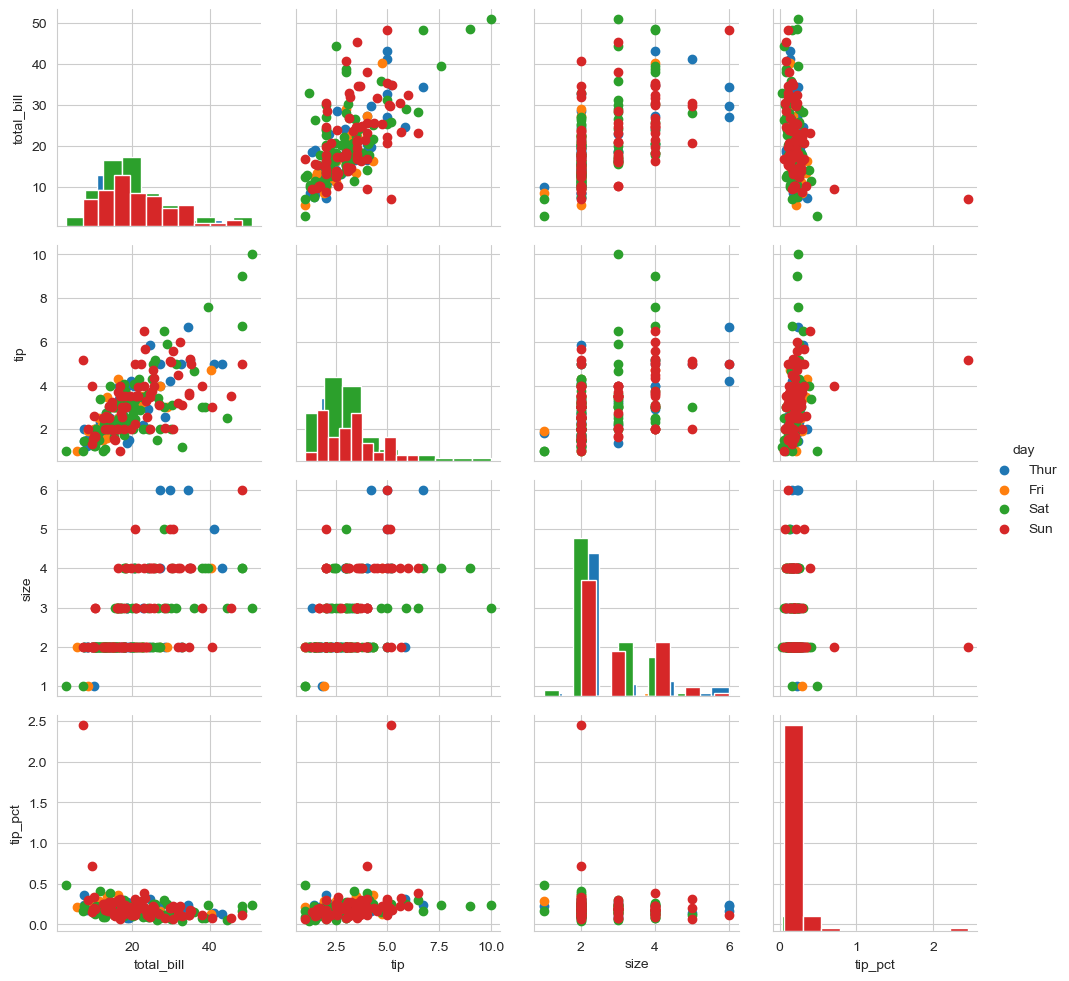

In [23]:
g = sns.PairGrid(tips, hue='day')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


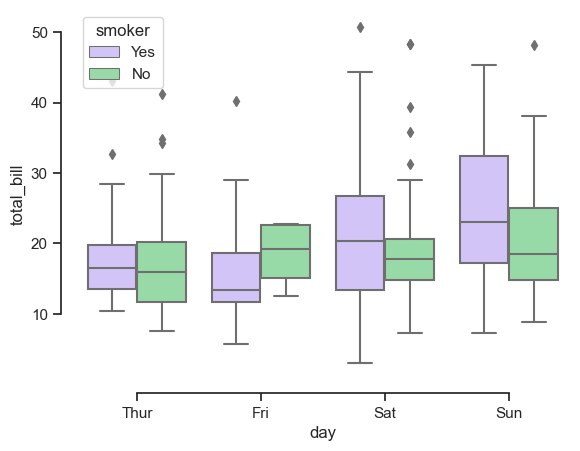

In [24]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

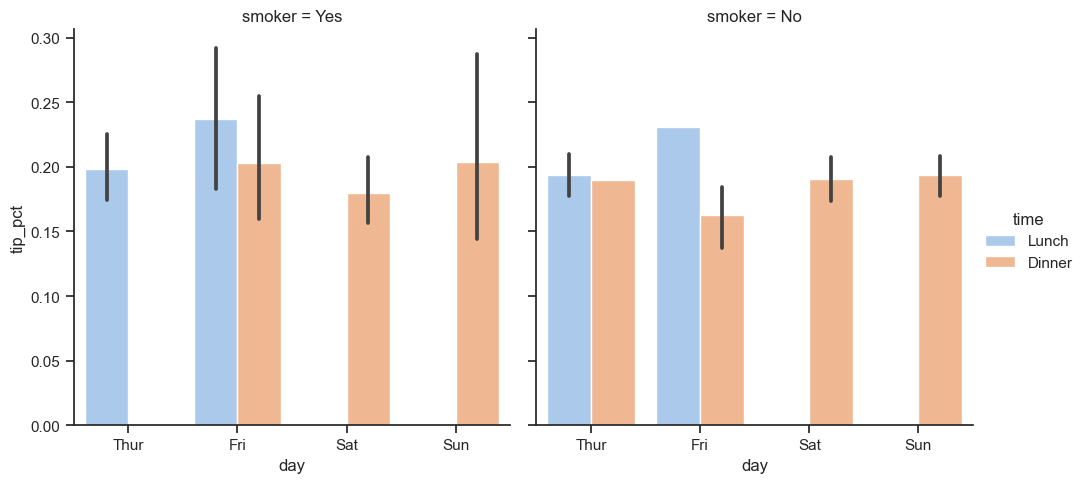

In [25]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


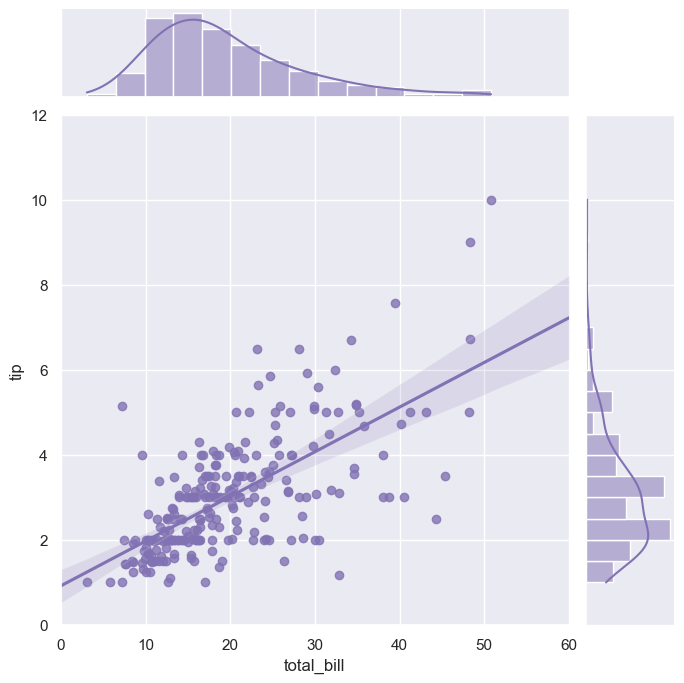

In [26]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


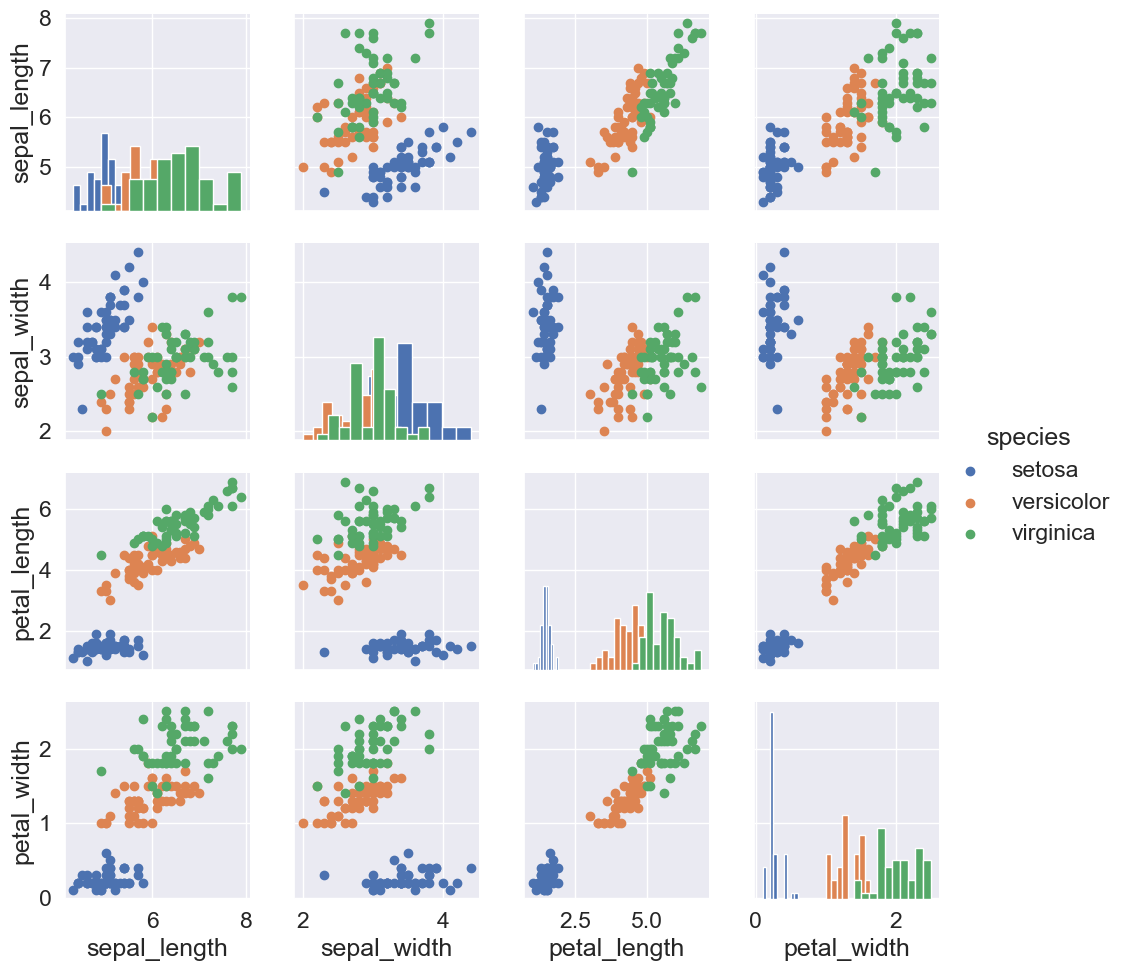

In [30]:
sns.set_theme(font_scale=1.5)
g = sns.PairGrid(iris, hue="species")#, height=6, aspect=1)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()